In [55]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

LOWER_DELETION_SIZE_LIMIT = 4000
UPPER_DELETION_SIZE_LIMIT = 10000
DELETION_ALLELE_FREQ_THRESHOLD = 0.00001

# Filter out false deletions: 
SUSPICIOUS_DELETION_SIZE_THRESHOLD = 1000000

DELETION_CLASS = 'observed' # TOPMED 

DELETION_TYPE = 'medium' 

WINDOW_SIZE = 1000000

ENHANCERS_CLASS = 'constraint-labeled' # 'constraint-labeled' or 'genehancer'

CONSTRAINED = True
SINGLETON = None

## Get deletion coordinates relative to centers of enhancers 

In [56]:
from shell import shell
import pandas as pd

def intersect_enhancer_straddling_windows_with_deletions(): 
  windows_with_deletions = f'{CONSTRAINT_TOOLS_DATA}/enhancer-straddling-windows/enhancer-straddling-windows-intersect-{DELETION_TYPE}-{DELETION_CLASS}-deletions.bed'

  intersect_script = f'{CONSTRAINT_TOOLS}/experiments/germline-model/chen-et-al-2022/intersect-enhancer-straddling-windows-with-deletions.sh'

  cmd = (
    f'bash '
    f'{intersect_script} '
    f'{DELETION_CLASS} {windows_with_deletions} '
    f'{DELETION_TYPE} '
    f'{LOWER_DELETION_SIZE_LIMIT} {UPPER_DELETION_SIZE_LIMIT} {DELETION_ALLELE_FREQ_THRESHOLD} '
    f'{SUSPICIOUS_DELETION_SIZE_THRESHOLD} '
    f'{WINDOW_SIZE} '
    f'{ENHANCERS_CLASS}'
  )
  print(shell(cmd))

  df = pd.read_csv(
    windows_with_deletions, 
    sep='\t',
  )

  return df 

ENHANCER_STRADDLING_WINDOWS = intersect_enhancer_straddling_windows_with_deletions() 
ENHANCER_STRADDLING_WINDOWS

Wrote windows with deletion overlaps to: /scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/enhancer-straddling-windows/enhancer-straddling-windows-intersect-medium-observed-deletions.bed



,window_chrom,window_start,window_end,enhancer_chrom,enhancer_start,enhancer_end,gene,enhancer_Gnocchi,Haploinsufficient,MGI essential,...,SAS_Male_Het,SAS_Male_HomAlt,SAS_Male_HemiAlt,SAS_Male_HemiAF,SAS_Female_AF,SAS_Female_HomRef,SAS_Female_Het,SAS_Female_HomAlt,PopMax_AF,InPop
0,chr1,3171135,4171136,chr1,3670636,3671636,TP73,5.884122,False,True,...,0,0,0,0.0,0.0,1378,0,0,0.000012,1
1,chr1,3171135,4171136,chr1,3670636,3671636,TP73,5.884122,False,True,...,0,0,0,0.0,0.0,1378,0,0,0.000006,1
2,chr1,3171135,4171136,chr1,3670636,3671636,TP73,5.884122,False,True,...,0,0,0,0.0,0.0,1306,0,0,0.000629,2
3,chr1,3171135,4171136,chr1,3670636,3671636,TP73,5.884122,False,True,...,0,0,0,0.0,0.0,1303,0,0,0.000304,2
4,chr1,3171135,4171136,chr1,3670636,3671636,TP73,5.884122,False,True,...,0,0,0,0.0,0.0,1373,0,0,0.000219,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110001,chr9,122308420,123308421,chr9,122807921,122808921,OR5C1,3.383762,False,False,...,0,0,0,0.0,0.0,1377,0,0,0.000006,1
110002,chr9,122308420,123308421,chr9,122807921,122808921,OR5C1,3.383762,False,False,...,0,0,0,0.0,0.0,1378,0,0,0.000019,1
110003,chr9,122308420,123308421,chr9,122807921,122808921,OR5C1,3.383762,False,False,...,0,0,0,0.0,0.0,1378,0,0,0.000006,1
110004,chr9,122308420,123308421,chr9,122807921,122808921,OR5C1,3.383762,False,False,...,0,0,0,0.0,0.0,1371,0,0,0.000012,1


In [57]:
# TODO: 

# def g_genehancer(df, singleton): 
#   df = df[
#     (df['window_chrom'] != 'chrX') &
#     (df['window_chrom'] != 'chrY')
#   ]
#   df = df[df['element'] == 'Enhancer']  
#   df = df[df['elite'] == 1]

#   df = df[['window_chrom', 'window_start', 'window_end', 'START', 'END', 'Het', 'SVLEN']]
#   df = df.rename(columns={
#     'START': 'deletion_start',
#     'END': 'deletion_end',
#     'Het': 'number_of_het_samples',
#     'SVLEN': 'deletion_size',
#   })

#   df['singleton'] = df['number_of_het_samples'] == 1
#   df = df[df['singleton'] == singleton]

#   df['window_center'] = (df['window_start'] + df['window_end']) / 2
#   df['deletion_center'] = (df['deletion_start'] + df['deletion_end']) / 2

#   df['deletion_start_new'] = df['deletion_start'] - df['window_center']
#   df['deletion_end_new'] = df['deletion_end'] - df['window_center']
#   df['deletion_center_new'] = df['deletion_center'] - df['window_center']

#   df['deletion_start_new'] = df['deletion_start_new'].clip(-0.5*WINDOW_SIZE, 0.5*WINDOW_SIZE)
#   df['deletion_end_new'] = df['deletion_end_new'].clip(-0.5*WINDOW_SIZE, 0.5*WINDOW_SIZE)
#   df['deletion_center_new'] = df['deletion_center_new'].clip(-0.5*WINDOW_SIZE, 0.5*WINDOW_SIZE)

#   return df[['deletion_start_new', 'deletion_end_new', 'deletion_center_new']].to_records(index=False).tolist()

In [58]:
pd.set_option('display.max_rows', 50)

def update_deletion_coordinates_in_constraint_labeled_windows(df): 
  df = df[[
    'window_chrom', 
    'window_start', 
    'window_end', 
    'deletion_count',
    'sum merged_deletion_overlap',
    'enhancer coordinates',
    'enhancer_length',
    'deletion count per bp',
    'fraction of bps that are deleted',
    'truly constrained',
    'START', 
    'END', 
    'Het', 
    'SVLEN'
  ]]

  df = df[df['truly constrained'] == CONSTRAINED]

  df = df[
    (df['window_chrom'] != 'chrX') &
    (df['window_chrom'] != 'chrY')
  ]

  df = df.rename(columns={
    'START': 'deletion_start',
    'END': 'deletion_end',
    'Het': 'number_of_het_samples',
    'SVLEN': 'deletion_size',
  })

  df['singleton'] = df['number_of_het_samples'] == 1
  if SINGLETON is not None:
    df = df[df['singleton'] == SINGLETON]

  df['window_center'] = (df['window_start'] + df['window_end']) / 2
  df['deletion_center'] = (df['deletion_start'] + df['deletion_end']) / 2

  df['deletion_start'] = df['deletion_start'] - df['window_center']
  df['deletion_end'] = df['deletion_end'] - df['window_center']
  df['deletion_center'] = df['deletion_center'] - df['window_center']

  df['deletion_start'] = df['deletion_start'].clip(-0.5*WINDOW_SIZE, 0.5*WINDOW_SIZE)
  df['deletion_end'] = df['deletion_end'].clip(-0.5*WINDOW_SIZE, 0.5*WINDOW_SIZE)
  df['deletion_center'] = df['deletion_center'].clip(-0.5*WINDOW_SIZE, 0.5*WINDOW_SIZE)

  return df

ENHANCER_STRADDLING_WINDOWS_PROCESSED = update_deletion_coordinates_in_constraint_labeled_windows(ENHANCER_STRADDLING_WINDOWS)
ENHANCER_STRADDLING_WINDOWS_PROCESSED.iloc[:20]

,window_chrom,window_start,window_end,deletion_count,sum merged_deletion_overlap,enhancer coordinates,enhancer_length,deletion count per bp,fraction of bps that are deleted,truly constrained,deletion_start,deletion_end,number_of_het_samples,deletion_size,singleton,window_center,deletion_center
0,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-238352.5,-232924.5,1,5428,True,3671135.5,-235638.5
1,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-236769.5,-232055.5,1,4714,True,3671135.5,-234412.5
2,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-194035.5,-185235.5,59,8800,False,3671135.5,-189635.5
3,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-193335.5,-185235.5,31,8100,False,3671135.5,-189285.5
4,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-180289.5,-174766.5,3,5523,False,3671135.5,-177528.0
5,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-180211.5,-170947.5,1,9264,True,3671135.5,-175579.5
6,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-143003.5,-137381.5,2,5622,False,3671135.5,-140192.5
7,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-141078.5,-136659.5,1,4419,True,3671135.5,-138869.0
8,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-120335.5,-116135.5,5,4200,False,3671135.5,-118235.5
9,chr1,3171135,4171136,2,1000,chr1:3670636-3671636,1000,0.002,1.0,True,-105294.5,-100912.5,1,4382,True,3671135.5,-103103.5


## Visualize pileup of deletions in the vicinity of enhancers
https://www.nxn.se/valent/visualizing-overlapping-intervals

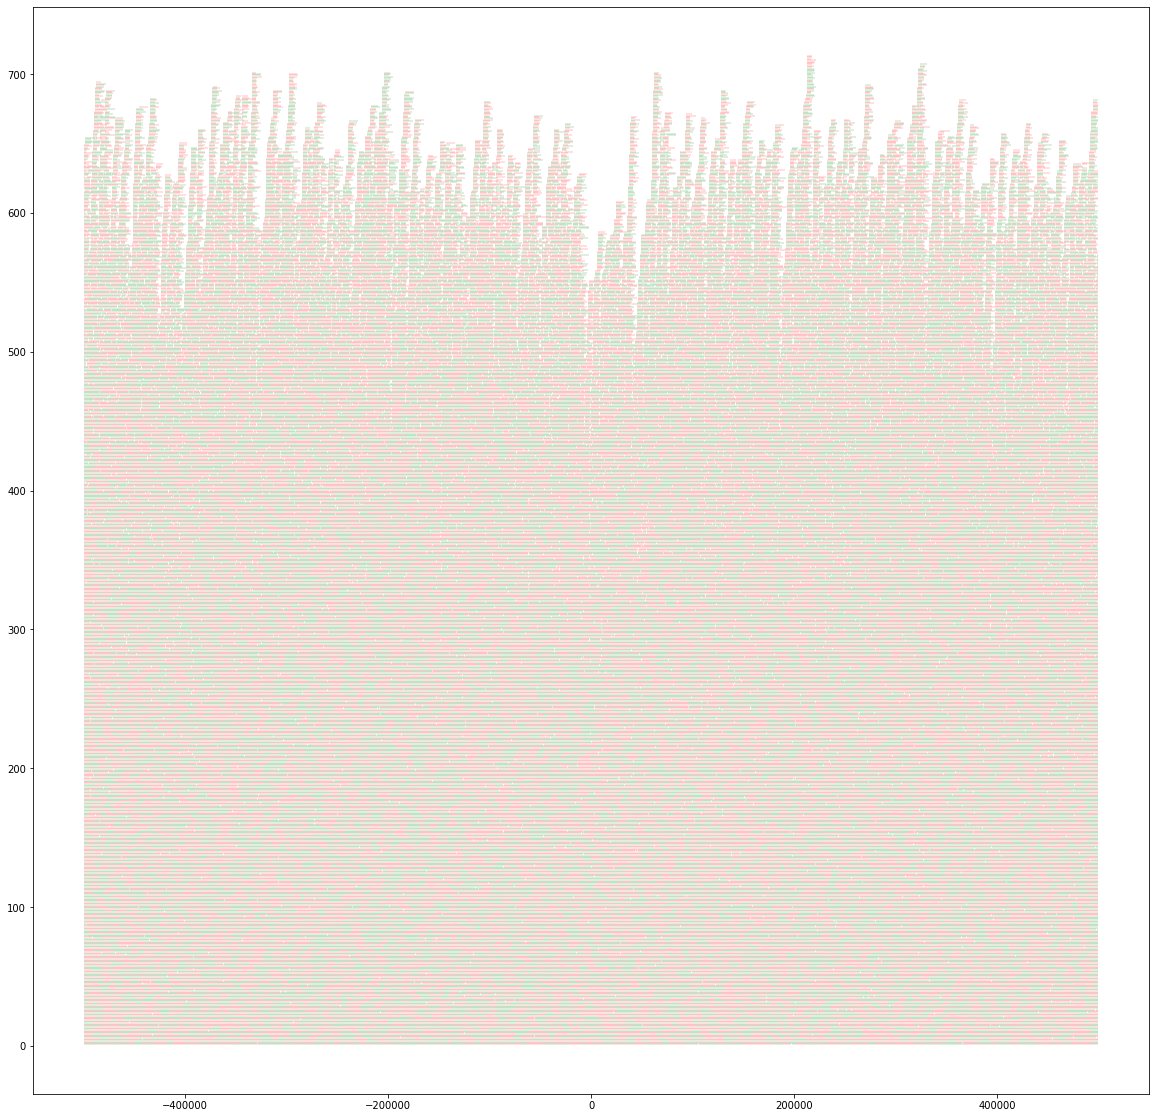

In [59]:
import matplotlib.pyplot as plt

def intervals2layers(si):
  layers = [[si[0]]]
  for p in si[1:]:
    for lay in layers:
      if lay[-1][1] < p[0]:
        lay.append(p)
        break
    else:
      layers.append([p])
  return layers

def plot_pileup(df):
  # intervals = [(2, 6), (7, 10), (1, 3), (4, 6), (8, 10), (1, 2), (3, 7), (9, 10), (1, 2), (3, 5), (6, 7), (8, 10), (2, 5), (8, 10)]
  intervals_with_centers_and_singletons = df[['deletion_start', 'deletion_end', 'deletion_center', 'singleton']].to_records(index=False).tolist()

  intervals = [(left, right, singleton) for left, right, center, singleton in intervals_with_centers_and_singletons]

  si = sorted(intervals, key=lambda p: p[0])
  layers = intervals2layers(si)

  plt.figure(figsize=(20, 20))

  for i, lay in enumerate(layers):
    x1, x2, colors = zip(*lay)
    colors = ['red' if color else 'green' for color in colors]
    plt.hlines([i + 1] * len(x1), x1, x2, colors=colors, lw=0.25) # type: ignore

plot_pileup(ENHANCER_STRADDLING_WINDOWS_PROCESSED)

In [60]:
# import random 

# intervals = []
# for i in range(1024):
#     x1 = random.normalvariate(0.5, 0.25)
#     x2 = x1 + random.random() / 16
#     intervals.append((x1, x2))

# si = sorted(intervals, key=lambda p: p[0])
# layers = intervals2layers(si)

# for i, lay in enumerate(layers):
#     x1, x2 = zip(*lay)
#     plt.hlines([i + 1] * len(x1), x1, x2)


In [61]:
# # intervals = [(2, 6), (7, 10), (1, 3), (4, 6), (8, 10), (1, 2), (3, 7), (9, 10), (1, 2), (3, 5), (6, 7), (8, 10), (2, 5), (8, 10)]
# intervals = g(DF, singleton=False)[:3000]

# plt.figure(figsize=(20, 20))

# for i, interval in enumerate(intervals):
#     x1, x2 = interval
#     plt.hlines(i, x1, x2, lw=0.25)


# # plt.xlim(0, 11)
# # plt.ylim(0, 6)

(array([7863., 6189., 5837., 5438., 4768., 5055., 5503., 5892., 6179.,
        8129.]),
 array([-500000., -400000., -300000., -200000., -100000.,       0.,
         100000.,  200000.,  300000.,  400000.,  500000.]),
 <BarContainer object of 10 artists>)

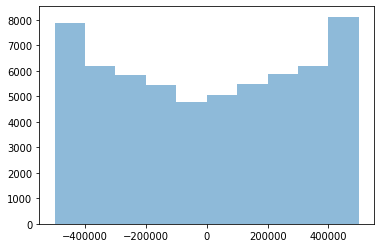

In [62]:
x1, x2, centers = zip(*intervals_with_centers)

plt.hist(centers, alpha=0.5)

## [TODO] Repeat analysis, but replacing enhancers with exons 

## Compute per-bp coverage of deletions in the vicinity of enhancers

https://www.geeksforgeeks.org/maximum-number-of-overlapping-intervals/ 

In [63]:
# TODO 
# Generalize the code below to include a per-bp coverage variable that is updated as the intervals are traversed 

In [64]:
# # Python3 program that print maximum
# # number of overlap
# # among given ranges

# # Function that print maximum
# # overlap among ranges
# def overlap(v):

# 	# variable to store the maximum
# 	# count
# 	ans = 0
# 	count = 0
# 	data = []

# 	# storing the x and y
# 	# coordinates in data vector
# 	for i in range(len(v)):

# 		# pushing the x coordinate
# 		data.append([v[i][0], 'x'])

# 		# pushing the y coordinate
# 		data.append([v[i][1], 'y'])

# 	# sorting of ranges
# 	data = sorted(data)

# 	# Traverse the data vector to
# 	# count number of overlaps
# 	for i in range(len(data)):

# 		# if x occur it means a new range
# 		# is added so we increase count
# 		if (data[i][1] == 'x'):
# 			count += 1

# 		# if y occur it means a range
# 		# is ended so we decrease count
# 		if (data[i][1] == 'y'):
# 			count -= 1

# 		# updating the value of ans
# 		# after every traversal
# 		ans = max(ans, count)

# 	# printing the maximum value
# 	print(ans)

# # Driver code
# v = [ [ 1, 2 ], [ 2, 4 ], [ 3, 6 ] ]
# overlap(v)

# # This code is contributed by mohit kumar 29
